# __Data exploration and imputation__

In [1]:
import pandas as pd

### __Loading our file__

In [2]:
file_path = '../data/marginal_emissions.pkl'

In [3]:
df = pd.read_pickle(file_path)
df.head()

,DateTime,t CO2-e / MWh
0,2018-06-01 03:55:00,0.912643
1,2018-06-01 03:50:00,0.912643
2,2018-06-01 03:45:00,0.912643
3,2018-06-01 03:40:00,0.912643
4,2018-06-01 03:35:00,0.912643


In [4]:
df.shape

(902550, 2)

In [5]:
df_dtindex = pd.read_pickle('../data/marginal_emissions_dtindex.pkl')

In [6]:
df_dtindex.index[3]

Timestamp('2018-06-01 03:40:00')

In [7]:
type(df_dtindex.index[3])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
time_difference = df_dtindex.index[3] - df_dtindex.index[4]
time_difference

Timedelta('0 days 00:05:00')

In [9]:
type(time_difference)

pandas._libs.tslibs.timedeltas.Timedelta

In [10]:
time_difference.total_seconds()

300.0

### __Exercise__

From start to end, the index of our dataframe should increment in 5 min intervals.

__Task 1:__

Check the datatype of the "DateTime" column of our dataframe "df".
Change the index of our dataframe "df" to a DateTimeIndex, using our "DateTime" column.
Make sure you get rid of the original index column (starting with: 0, 1, 2, 3,...).

__Task 2:__

Write a function which takes in our dataframe "df" and checks if the index of our dataframe entirely increments in 5 min intervals. If your fucntions finds any interval not equal to 5 min, it should return the position where this occurs (e.g. row 783) and duration of the interval at that position (e.g. row 783: 25 min).

__Task 3:__

If you find any such different intervals, modify our dataframe index so that it entirely increments in 5 min intervals. __Hint:__ check out the pd.data_range() and DataFrame.reindex() methods.

__Note:__

Use your knowledge from your pandas lecture and use Google as your best friend.

### __Solution 1__

In [14]:

#change index of dataframe df to DateTimeIndex


In [11]:
df.DateTime = pd.to_datetime(df.DateTime)
df.set_index('DateTime', inplace = True, drop = True)

In [12]:
df.head()

,t CO2-e / MWh
DateTime,
2018-06-01 03:55:00,0.912643
2018-06-01 03:50:00,0.912643
2018-06-01 03:45:00,0.912643
2018-06-01 03:40:00,0.912643
2018-06-01 03:35:00,0.912643


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 902550 entries, 2018-06-01 03:55:00 to 2009-07-01 04:00:00
Data columns (total 1 columns):
t CO2-e / MWh    902550 non-null float64
dtypes: float64(1)
memory usage: 13.8 MB


In [32]:
#df.to_pickle('../data/marginal_emissions_dtindex_complete.pkl')

### __Solution 2__

In [53]:
def correct_timedelta(df, time_diff):
    '''
    df.index must be DateTimeIndex
    Returns two lists
    df=table_of_interest
    col="column_of_interest"
    time_diff=time_diff in seconds as int
    '''
    lst = []
    lst_i = []
    
    for i in range(1,df.shape[0]):
        delta = abs(df.index[i] - df.index[i-1])
        if int(delta.total_seconds()) != int(time_diff):
            lst.append(("from index {} on, it has been {} s or {} h.".format(i,int(delta.total_seconds()),(int(delta.total_seconds()/3600)))))
            lst_i.append((df.index[i],int(delta.total_seconds())))
            
    return lst, lst_i

In [48]:
def correct_timedelta(df, time_diff):

#your code here

    return index_and_duration_of_any_non_5min_time_gap

In [10]:

#see what your output is


### __Solution 3__

In [15]:
#hypothetical number of 5min intervals given the max and min values of the df time range
new_time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="5min")
len(new_time_range)

938016

In [16]:
df_new = df.reindex(new_time_range).sort_index(ascending=False)
df_new.shape

(938016, 1)

In [17]:
file_path = '../data/marginal_emissions_dtindex_nans.pkl'
pd.to_pickle(df_new, file_path)

In [18]:
df.isna().any()

t CO2-e / MWh    False
dtype: bool

In [19]:
df_new.isna().any()

t CO2-e / MWh    True
dtype: bool

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

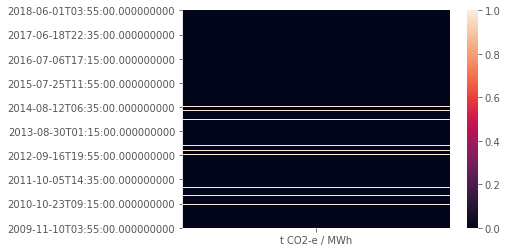

In [21]:
plt.style.use('ggplot')

fig = sns.heatmap(df_new.isna(), yticklabels=100000)

### __Data imputation of time series__

In [93]:

#sketch on whiteboard


In [22]:
import numpy as np

In [57]:
df_impute = df_new.assign(rolling_mean=df_new['t CO2-e / MWh'].rolling(window=30, min_periods=1).mean())

In [58]:
df_impute.head()

,t CO2-e / MWh,rolling_mean
2018-06-01 03:55:00,0.912643,0.912643
2018-06-01 03:50:00,0.912643,0.912643
2018-06-01 03:45:00,0.912643,0.912643
2018-06-01 03:40:00,0.912643,0.912643
2018-06-01 03:35:00,0.912643,0.912643


In [59]:
df_impute.isna().any()

t CO2-e / MWh     True
rolling_mean     False
dtype: bool

In [60]:
df_impute['t CO2-e / MWh'] = np.where(df_impute['t CO2-e / MWh'].isnull(),\
                                  df_impute['rolling_mean'], df_impute['t CO2-e / MWh'])

df_impute.drop(columns='rolling_mean', inplace=True)

In [61]:
df_impute.isna().any()

t CO2-e / MWh    False
dtype: bool

In [62]:
pd.set_option('display.max_rows', None)
df_impute[df_impute['t CO2-e / MWh'].isna()].iloc[:102,]

,t CO2-e / MWh


In [66]:
#file_path = '../data/marginal_emissions_impute.pkl'
#df_impute.to_pickle(file_path)